In [197]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Import the module for statistical test
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats

pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()

In [142]:
# Import the data
data = 'marketing_AB.csv'
df = pd.read_csv(data)

# Explore Dataset

## Basic Information

In [143]:
# Display 5 top rows of the data
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [144]:
# Overview data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [145]:
# Get data shape
df.shape

(588101, 7)

In [146]:
# Descibe data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,588101.0,NaN,NaN,NaN,294050.0,169770.279667,0.0,147025.0,294050.0,441075.0,588100.0
user id,588101.0,NaN,NaN,NaN,1310692.215793,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
test group,588101,2,ad,564577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
converted,588101,2,False,573258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total ads,588101.0,NaN,NaN,NaN,24.820876,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads day,588101,7,Friday,92608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most ads hour,588101.0,NaN,NaN,NaN,14.469061,4.834634,0.0,11.0,14.0,18.0,23.0


In [147]:
# Get name of columns
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

## Data Cleansing

In [148]:
# checking for NUll
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [149]:
# checking for duplicated
df.duplicated().sum()

0

In [150]:
#drop unecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [151]:
# rename column for better format
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


## Exploratory Data Analysis

In [152]:
# Number of used_id by each test_group 
df_tg = df.groupby(['test_group'])['user_id'].nunique()
print(df_tg)

test_group
ad     564577
psa     23524
Name: user_id, dtype: int64


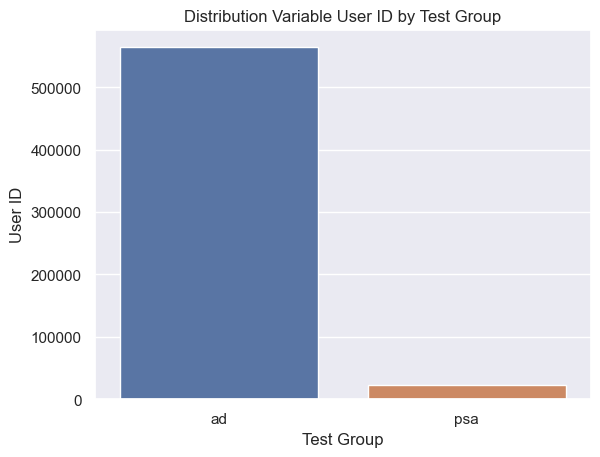

In [153]:
# Distribution variable user id by test group
sns.countplot(data=df, x='test_group')
plt.title('Distribution Variable User ID by Test Group')
plt.xlabel('Test Group')
plt.ylabel('User ID')
plt.show()

In [154]:
# Number of uset_id by each test_group 
df_con = df.groupby(['converted'])['user_id'].nunique()
print(df_con)

converted
False    573258
True      14843
Name: user_id, dtype: int64


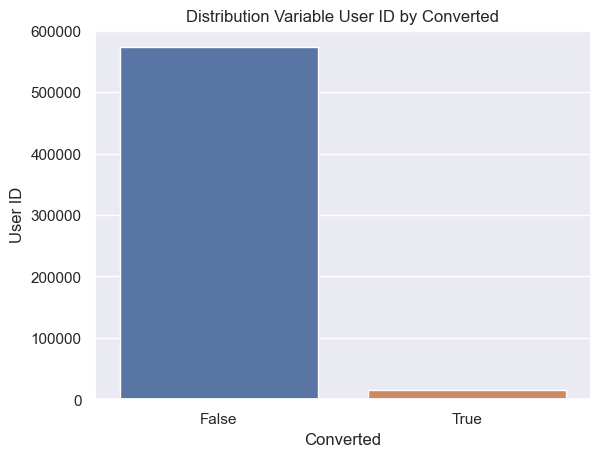

In [155]:
# Distribution variable user id by converted
sns.countplot(data=df, x='converted')
plt.title('Distribution Variable User ID by Converted')
plt.xlabel('Converted')
plt.ylabel('User ID')
plt.show()

In [156]:
# Conversion rate calculation
conversion_rate = (df['converted'].sum() / df['user_id'].nunique()) * 100

# Display the conversion rate with two decimal places
print('Conversion rate = {:.2f}%'.format(conversion_rate))

Conversion rate = 2.52%


The conversion rate we got doesn't prove that the ads are successful. We need to check more closely.

In [157]:
# Calculate the purchase rate for each group separately
# DataFrame for ad
df_ad = df[df['test_group'] == 'ad']
df_ad.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [158]:
# DataFrame for psa
df_psa = df[df['test_group'] == 'psa']
df_psa.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
18,900681,psa,False,248,Saturday,19
38,905704,psa,False,27,Thursday,8
68,904595,psa,False,13,Tuesday,19
140,901904,psa,False,32,Wednesday,19
157,902234,psa,False,105,Tuesday,19


In [166]:
# Calculate the number of conversions in the 'ad' group
count_conversions_ad = converted_df_ad['user_id'].count()

# Calculate the total number of observations in the 'ad' group
total_observations_ad = df_ad['user_id'].nunique()

# Calculate the purchase rate for the 'ad' group as a percentage with two decimal places
purchase_rate_ad = (count_conversions_ad / total_observations_ad) * 100

# Calculate the number of conversions in the 'psa' group
count_conversions_psa = converted_df_psa['user_id'].count()

# Calculate the total number of observations in the 'psa' group
total_observations_psa = df_psa['user_id'].nunique()

# Calculate the purchase rate for the 'psa' group as a percentage with two decimal places
purchase_rate_psa = (count_conversions_psa / total_observations_psa) * 100

# Display the purchase rate for each group as a percentage with two decimal places
print("Purchase Rate for 'ad' Group: {:.2f}%".format(purchase_rate_ad))
print("Purchase Rate for 'psa' Group: {:.2f}%".format(purchase_rate_psa))

Purchase Rate for 'ad' Group: 2.55%
Purchase Rate for 'psa' Group: 1.79%


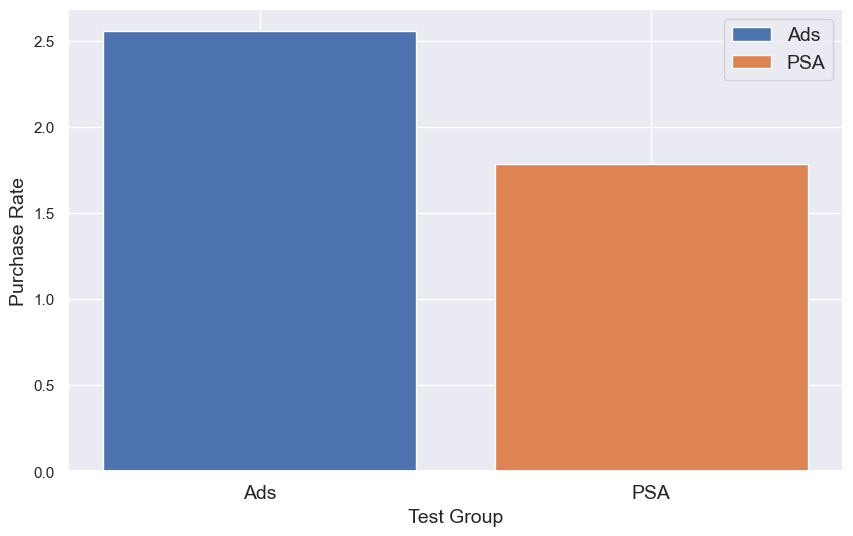

In [160]:
# Visualize
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Buat plot
ax.bar('ad', pr_ad, label='Ads')
ax.bar('psa', pr_psa, label='PSA')

# Styling plot
ax.set_ylabel('Purchase Rate', fontsize=14)
ax.set_xlabel('Test Group', fontsize=14)
ax.set_xticklabels(labels=['Ads', 'PSA'], fontsize=14)
ax.legend(fontsize=14)
plt.show()

The conversion rate results indicate that the Ads are more successful than the PSA, with a conversion rate of 2.55% compared to 1.79%. This suggests that the Ads are effective, but we need a statistical analysis to confirm if this difference is significant and if the campaign can be considered a success.

## Hypothesis Testing

### Define Null hypothesis ($H_0$) and alternative hypothesis ($H_1$)

Make the hypothesis :

- Hypothesis Null ($H_0$): There is no significant difference between the conversion rates of the Ads group and the PSA group.

- Alternative Hypothesis ($H_1$): The conversion rate of the Ads group is significantly greater than the conversion rate of the PSA group.
------------
Set siginificance level (alpha) = 0.05

In [196]:
# Data for 'ad' and 'psa' groups
count_purchase = [count_conversions_ad, count_conversions_psa]  # Number of conversions in each group
count_observation = [total_observations_ad, total_observations_psa]  # Total number of observations in each group

# Perform one-sided Z-test (greater)
z_stat, p_value = proportions_ztest(count=count_purchase, nobs=count_observation, alternative='larger')

# Determine the test result
alpha = 0.05  # Significance level
if p_value < alpha:
    print('There is no significant difference between the conversion rates of the Ads group and the PSA group.')
else:
    print('Test Result: Not enough evidence to reject the null hypothesis. The conversion rate of the Ads group is significantly greater than the conversion rate of the PSA group.')

# Display the Z-Score and P-Value
print("Z-Score:", z_stat)
print("P-Value:", p_value)


There is no significant difference between the conversion rates of the Ads group and the PSA group.
Z-Score: 7.3700781265454145
P-Value: 8.526403580779863e-14


### Create decision rules

In [190]:
# Significance level (alpha)
alpha = 0.05  # 5%

# Calculate the critical value for a one-sided test (right tail)
z_crit = stats.norm.ppf(1 - alpha)
print(f'z critical value : {z_crit:.4f}')

z critical value : 1.6449


In [191]:
# Make decisions from z-stats and z-crit
if z_stat > z_crit:
  print('Decision : Reject Null Hypothesis')
else:
  print('Decision : Fail to Reject Null Hypothesis')

Decision : Reject Null Hypothesis


In [192]:
# Comparison of P-Value with alpha.
if p_value<0.05:
  print('Decision : Reject Null Hypothesis')
else:
  print('Decision : Fail to Reject Null Hypothesis')

Decision : Reject Null Hypothesis


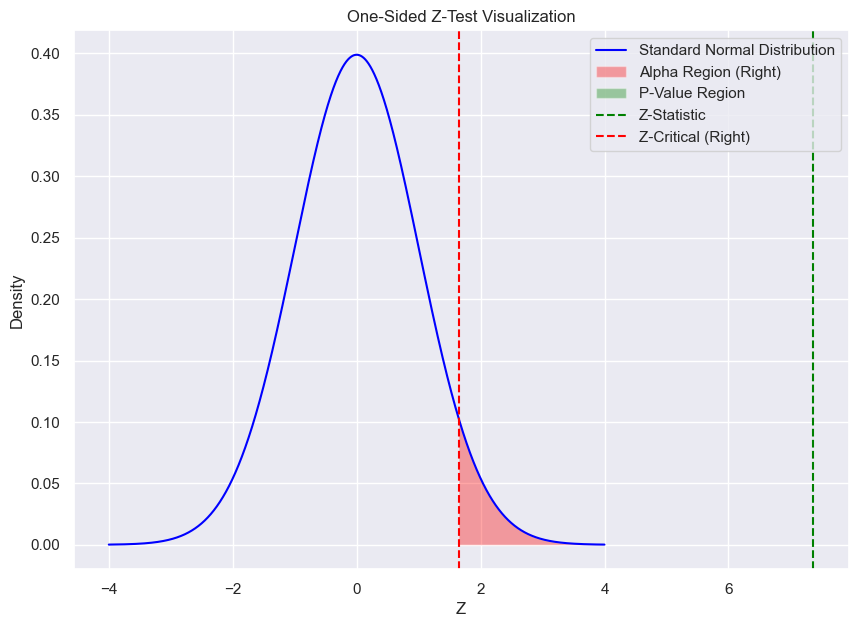

Z-Statistic: 7.3701
Z-Critical (Right): 1.6450


In [195]:
# Visualization
# Set up the figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot the standard normal distribution
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1), color='blue', label='Standard Normal Distribution')

# Define the z-critical value for the right tail (adjust this value according to your significance level)
z_crit_right = 1.645  # Right critical value for alpha = 0.05 (one-sided)

# Plot the alpha region (right tail)
x_alpha_right = np.arange(z_crit_right, 4, 0.001)
y_alpha_right = stats.norm.pdf(x_alpha_right)
plt.fill_between(x=x_alpha_right, y1=y_alpha_right, facecolor='red', alpha=0.35, label='Alpha Region (Right)')

# Plot the p-value region (for visualization purposes)
x_pvalue = np.arange(z_stat, 4, 0.001)  # Adjust the range accordingly
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x=x_pvalue, y1=y_pvalue, facecolor='green', alpha=0.35, label='P-Value Region')

# Plot the z-statistic and z-critical value
plt.axvline(np.round(z_stat, 4), color="green", linestyle="--", label="Z-Statistic")
plt.axvline(z_crit_right, color="red", linestyle="--", label="Z-Critical (Right)")

# Add labels, legend, and show the plot
plt.legend()
plt.xlabel("Z")
plt.ylabel("Density")
plt.title("One-Sided Z-Test Visualization")
plt.grid(True)
plt.show()

# Print z-statistic and z-critical value
print(f"Z-Statistic: {z_stat:.4f}")
print(f"Z-Critical (Right): {z_crit_right:.4f}")


### Conclution

Based on the results of the z-test and confidence interval calculations, here are the conclusions that can be drawn:

- Statistical Conclusion:
 - The z-test results indicate a significant difference between the Ads group and the PSA group in terms of conversion rates.